In [86]:
#WEI Chen
#SD204 TP2 SVD-PCA
#22/01/2017

question 1:
If we rewrite the eq(1), we will find it equals to prove: y=A(B X^T)^+ X^T y,
where A=XX^T+lmd Ip and B=X^TX+lmd Ip, ^+ is pseudo-inverse of the matrice.
Varify eq(1) when n=100, p=2000, the equality is
True
Varify eq(1) when n=2000, p=100, the equality is
False

question 2:
We use the running time for calculating left/right side of eq(1) to indicate the cost of calculate
Keep n=1000, vary p from 100 to 2000, get the running time shown as following plot:
We can see when n keeps invariant and p increases, the calculate complexity for right side increases much greatly than left side.
Becase the right side involves inversing a p*p matrice, while the left side involves one of n*n.
Thus we can conclude that when n>p, calculate by the right side of eq(1) is simpler; when n<p, calculate by the left side of eq(1) is simpler


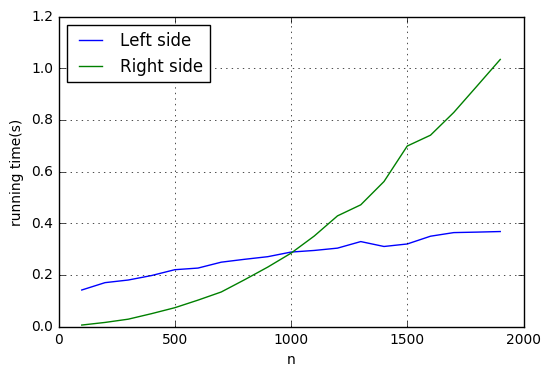

In [89]:
#ex 1
import numpy as np
import random
import time
import matplotlib.pyplot as plt

#question 1
print('question 1:')
print('If we rewrite the eq(1), we will find it equals to prove: y=A(B X^T)^+ X^T y,')
print('where A=XX^T+lmd Ip and B=X^TX+lmd Ip, ^+ is pseudo-inverse of the matrice.')
def varify(n,p,lmd):
    X=np.zeros([n,p])
    y=np.zeros([n,1])
    for i in range(n):
        y[i][0]=random.uniform(-1,1)
    for i in range(p):
        for j in range(n):
            X[j][i]=random.gauss(0,2)
    Idn=np.eye(n)
    Idp=np.eye(p)
    left=y
    A=np.dot(X, np.transpose(X)) + lmd*Idn
    B=np.dot(np.transpose(X),X) + lmd*Idp
    pinverse=np.linalg.pinv(np.dot(B,np.transpose(X)))
    right=np.dot(np.dot(np.dot(A,pinverse),np.transpose(X)),y)
    return np.allclose(left, right, rtol=1e-05, atol=1e-08, equal_nan=False)

print('Varify eq(1) when n=100, p=2000, the equality is')
print(varify(100,2000,1e-5))
print('Varify eq(1) when n=2000, p=100, the equality is')
print(varify(2000,100,1e-5))

#question 2
print('')
print('question 2:')
print('We use the running time for calculating left/right side of eq(1) to indicate the cost of calculate')
print('Keep n=1000, vary p from 100 to 2000, get the running time shown as following plot:')
print('We can see when n keeps invariant and p increases, the calculate complexity for right side increases much greatly than left side.')
print('Becase the right side involves inversing a p*p matrice, while the left side involves one of n*n.')
print('Thus we can conclude that when n>p, calculate by the right side of eq(1) is simpler; '
      'when n<p, calculate by the left side of eq(1) is simpler')
def leftway(X,y):
    A=np.dot(X, np.transpose(X)) + 1e-5*np.eye(X.shape[0])
    return np.dot(np.dot(X.T, np.linalg.inv(A)) ,y)
def rightway(X,y):
    B=np.dot(np.transpose(X),X) + 1e-5*np.eye(X.shape[1])
    return np.dot(np.dot(np.linalg.inv(B),X.T) ,y)

XX=np.zeros([1000,2000])
y=np.zeros([1000,1])
for i in range(1000):
    y[i][0]=random.uniform(-1,1)
for i in range(2000):
    for j in range(1000):
        XX[j][i]=random.gauss(0,2)

lefttime=[]
righttime=[]
for pi in range(100,2000,100):
#     print(pi)
    X=XX[:,0:pi]
    start = time.clock()
    leftway(X,y)
    end = time.clock()
    lefttime.append(end-start)
    start = time.clock()
    rightway(X,y)
    end = time.clock()
    righttime.append(end-start)

plt.plot(range(100,2000,100),lefttime, label='Left side')
plt.plot(range(100,2000,100),righttime,label='Right side')
plt.xlabel('n')
plt.ylabel('running time(s)')
plt.legend( loc='upper left' )
plt.grid()
plt.show()

question 3:
Binomial and Uniform distributions are used in this question.

question 4&5:
Singular values and eigenvalues of a Binomial sample


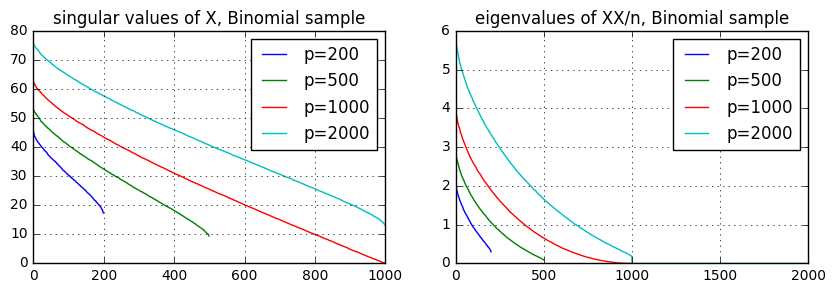

Singular values and eigenvalues of a uniform distributed sample


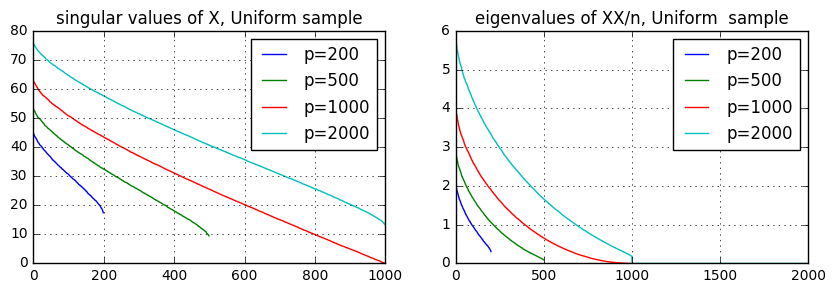

In [92]:
#ex2
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import numpy as np
import math

#question 3 4 5
print('question 3:')
print('Binomial and Uniform distributions are used in this question.')
print('')
n=1000
p1=200
p2=500
p3=1000
p4=2000
X4=np.zeros([n,p4])
for i in range(p4):
    for j in range(n):
        X4[j][i]=2*np.random.binomial(1,0.5)-1
X1=X4[:,0:p1]
X2=X4[:,0:p2]
X3=X4[:,0:p3]

print('question 4&5:')
print('Singular values and eigenvalues of a Binomial sample' )
U, s1, V = np.linalg.svd(X1, full_matrices=False)
U, L1, V =np.linalg.svd(np.dot(np.transpose(X1),X1)/n)
U, s2, V = np.linalg.svd(X2, full_matrices=False)
U, L2, V =np.linalg.svd(np.dot(np.transpose(X2),X2)/n)
U, s3, V = np.linalg.svd(X3, full_matrices=True)
U, L3, V =np.linalg.svd(np.dot(np.transpose(X3),X3)/n)
U, s4, V = np.linalg.svd(X4, full_matrices=False)
U, L4, V =np.linalg.svd(np.dot(np.transpose(X4),X4)/n)

fig, ax = plt.subplots(ncols=2,figsize=(10, 3) )
ax[0].plot(range(min(n,p1)),s1,label='p=200')
ax[0].plot(range(min(n,p2)),s2,label='p=500')
ax[0].plot(range(min(n,p3)),s3,label='p=1000')
ax[0].plot(range(min(n,p4)),s4,label='p=2000')
ax[0].set_title('singular values of X, Binomial sample')
ax[0].legend( loc='upper right' )
ax[0].grid()

ax[1].plot(range(p1),L1,label='p=200')
ax[1].plot(range(p2),L2,label='p=500')
ax[1].plot(range(p3),L3,label='p=1000')
ax[1].plot(range(p4),L4,label='p=2000')
ax[1].set_title('eigenvalues of XX/n, Binomial sample')
ax[1].legend( loc='upper right' )
ax[1].grid()
plt.show()

#uniform sample
print('Singular values and eigenvalues of a uniform distributed sample' )
X4=2*math.sqrt(3) * np.random.random_sample((n, p4))-math.sqrt(3)
X1=X4[:,0:p1]
X2=X4[:,0:p2]
X3=X4[:,0:p3]

U, s1, V = np.linalg.svd(X1, full_matrices=False)
U, L1, V =np.linalg.svd(np.dot(np.transpose(X1),X1)/n)
U, s2, V = np.linalg.svd(X2, full_matrices=False)
U, L2, V =np.linalg.svd(np.dot(np.transpose(X2),X2)/n)
U, s3, V = np.linalg.svd(X3, full_matrices=True)
U, L3, V =np.linalg.svd(np.dot(np.transpose(X3),X3)/n)
U, s4, V = np.linalg.svd(X4, full_matrices=False)
U, L4, V =np.linalg.svd(np.dot(np.transpose(X4),X4)/n)

fig, ax = plt.subplots(ncols=2,figsize=(10, 3) )
ax[0].plot(range(min(n,p1)),s1,label='p=200')
ax[0].plot(range(min(n,p2)),s2,label='p=500')
ax[0].plot(range(min(n,p3)),s3,label='p=1000')
ax[0].plot(range(min(n,p4)),s4,label='p=2000')
ax[0].set_title('singular values of X, Uniform sample')
ax[0].legend( loc='upper right' )
ax[0].grid()

ax[1].plot(range(p1),L1,label='p=200')
ax[1].plot(range(p2),L2,label='p=500')
ax[1].plot(range(p3),L3,label='p=1000')
ax[1].plot(range(p4),L4,label='p=2000')
ax[1].set_title('eigenvalues of XX/n, Uniform  sample')
ax[1].legend( loc='upper right' )
ax[1].grid()

plt.show()


question 7&8:
We define the MSE between estimated u,v and u,v resulted from svd().
From the MSE iterative curve, we see the MSE finally converge to 0 regardless of the initial values of u,v.
This proves the convergence of the algorithm, and it converges to the same result for various initial values.


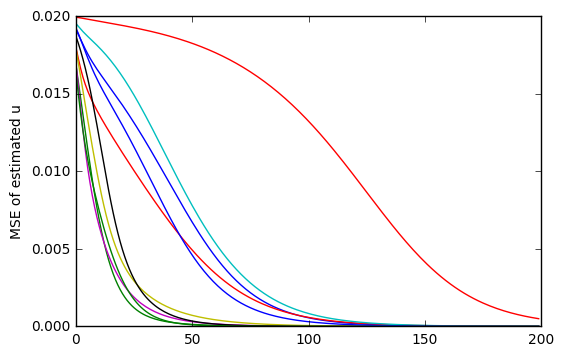

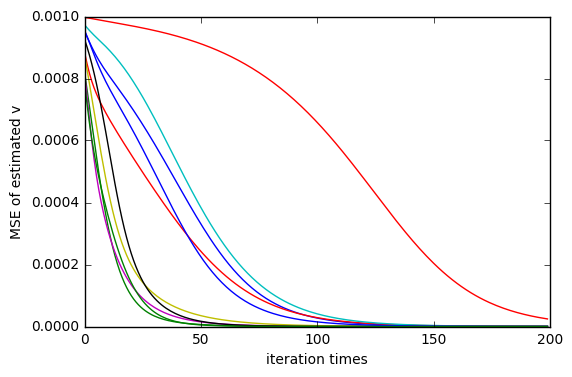

In [94]:
#ex 3
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

n=100
p=2000
X=np.zeros([n,p])
for i in range(p):
    for j in range(n):
        X[j][i]=random.gauss(0,2)
        
#question 6
def puissance(X,niter):
    [n,p]=X.shape
    u=np.random.normal(1,10,[n,1])
    v=np.random.normal(1,10,[p,1])
    U, s, V = np.linalg.svd(X, full_matrices=False)
    uE=np.zeros([niter,1])
    vE=np.zeros([niter,1])
    for i in range(niter):
        u=np.dot(X,v)
        v=np.dot(np.transpose(X),u)
        v=v/np.linalg.norm(v,2)
        u=u/np.linalg.norm(u,2)
        uE[i,0]=min(mean_squared_error(u,U[:,0]),mean_squared_error(u,-U[:,0]))
        vE[i,0]=min(mean_squared_error(v,np.transpose(V[0,:])),mean_squared_error(v,np.transpose(-V[0,:])))
    return [u,v,uE,vE]

#question 7 8
print('question 7&8:')
print('We define the MSE between estimated u,v and u,v resulted from svd().')
print('From the MSE iterative curve, we see the MSE finally converge to 0 regardless of the initial values of u,v.')
print('This proves the convergence of the algorithm, and it converges to the same result for various initial values.')
for i in range(10):
    [u,v,uE,vE]=puissance(X,200)
    plt.figure(1)
    plt.plot(range(200),uE)
    plt.ylabel('MSE of estimated u')
    plt.grid()
    plt.figure(2)
    plt.plot(range(200),vE)
    plt.xlabel('iteration times')
    plt.ylabel('MSE of estimated v')
    plt.grid()
plt.show()


question 12&13:


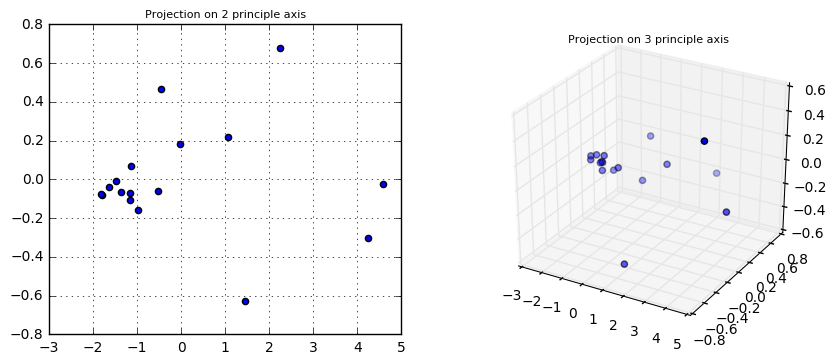

question 14a:
And we find the 2D and 3D graphs with the method in 14(a)(b) are identical to the previous ones,
except that they are inverse in horizontal or vertial direction.


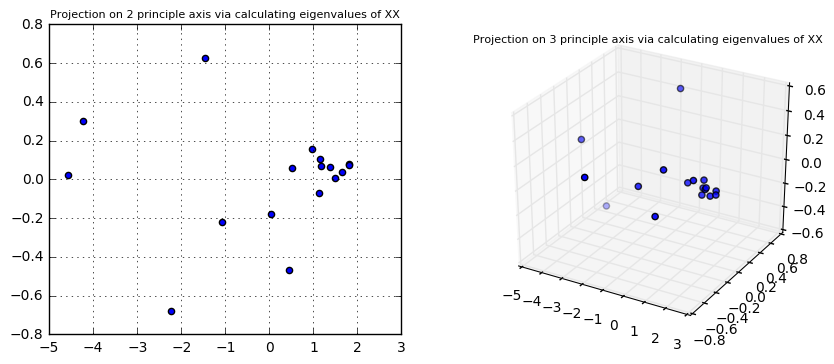

question 14b:


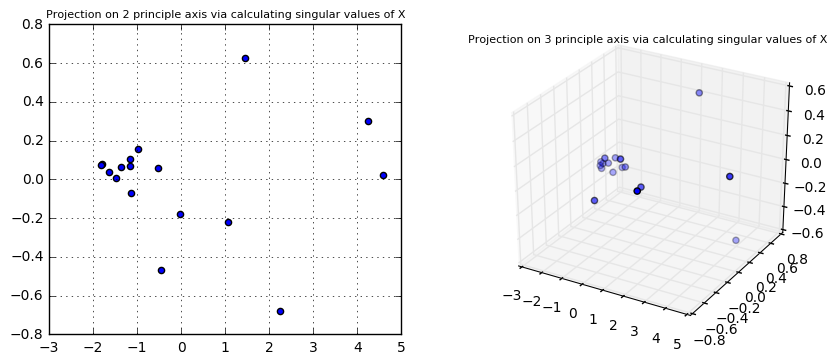

question 14c:
Calculate by method in 14a costs  0.0010259032424073666 s
Calculate by method in 14b costs  0.0006498786788142752 s
So we can conclude that method in 14b is more efficent, because 14a involves calculating XT multiply X, which improves the complexity.


In [100]:
#ex 4
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import time

#question 10
file = "C:/Users/Win7-Wei/Desktop/travaux pratiques/SD204 TP2/defraconsumption.csv"
data=pd.read_csv(os.path.basename(file),sep=';')
data=data.set_index('Unnamed: 0')

#question 11
X=preprocessing.scale(data)
data.loc[:,'England':'N Ireland']=X
# print(data)
# ['England', 'Wales' ,'Scotland', 'N Ireland']

#question 12
print('question 12&13:')
pca = PCA(n_components=2)
pca.fit(data)
data2D = pca.transform(data)
# print(data2D)

plt.close(0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.scatter(data2D[:,0],data2D[:,1])
ax.grid()
ax.set_title('Projection on 2 principal axis',fontsize = 8)

#question 13
pca = PCA(n_components=3)
pca.fit(data)
data3D = pca.transform(data)
# print(data3D)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(data3D[:,0],data3D[:,1],data3D[:,2])
ax.grid()
ax.set_title('Projection on 3 principal axis',fontsize = 8)
plt.show()

#question 14a
print('question 14a:')
print('And we find the 2D and 3D graphs with the method in 14(a)(b) are identical to the previous ones,')
print('except that they are inverse in horizontal or vertial direction.')
starta=time.clock()
U,s,V=np.linalg.svd(np.dot(np.transpose(X),X))
U2=U[:,[0,1]]
U3=U[:,[0,1,2]]
X2D=np.dot(X,U2)
X3D=np.dot(X,U3)
enda=time.clock()
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.scatter(X2D[:,0],X2D[:,1])
ax.grid()
ax.set_title('Projection on 2 principal axis via calculating eigenvalues of XX',fontsize = 8)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X3D[:,0],X3D[:,1],X3D[:,2])
ax.grid()
ax.set_title('Projection on 3 principal axis via calculating eigenvalues of XX',fontsize = 8)
plt.show()

#question 14b
print('question 14b:')
startb=time.clock()
U,s,V=np.linalg.svd(X,full_matrices=False)
V2=V[[0,1],:]
V3=V[[0,1,2],:]
X2D=np.dot(X,np.transpose(V2))
X3D=np.dot(X,np.transpose(V3))
endb=time.clock()
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.scatter(X2D[:,0],X2D[:,1])
ax.grid()
ax.set_title('Projection on 2 principal axis via calculating singular values of X',fontsize = 8)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X3D[:,0],X3D[:,1],X3D[:,2])
ax.grid()
ax.set_title('Projection on 3 principal axis via calculating singular values of X',fontsize = 8)

plt.show()

#question 14c
print('question 14c:')
print('Calculate by method in 14a costs ',enda-starta,'s')
print('Calculate by method in 14b costs ',endb-startb,'s')
print('So we can conclude that method in 14b is more efficent, '
     'because 14a involves calculating XT multiply X, which improves the complexity.')

Total dataset size:
n_samples: 1288 which represents the number of samples.
n_features: 1850 different features captured in each face image.
n_classes: 7 the number of classes in which the data can be divided.

question 16:
The variables in the database represent different features captured in these face images.

question 17:
With method of pourcentage d’inertie, the optimal principle components will be selected as the components whose inertie is superior to the average inertie.
So we calculate the inertie of each components and the average inertie respectively, shown in the following graph:


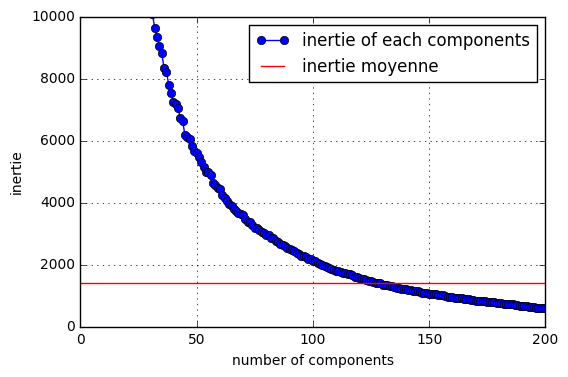

The optimal nunber of principle components should be 128

question 17b:


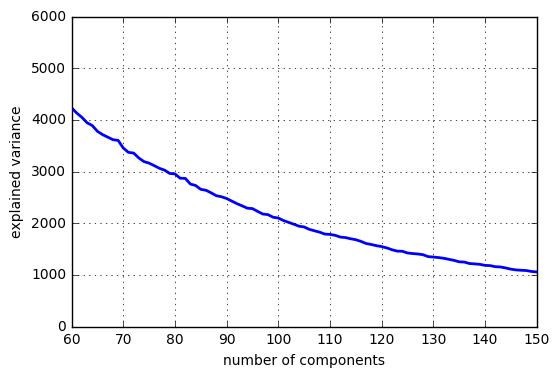

We choose [60, 80,100,120,150] as the candidate optimal number of principle components.
The optimal nunber of principle components is estimated as:
(This process is running slowly, please wait...)
100


In [103]:
# ex 5
from sklearn.datasets import fetch_lfw_people
import  PIL
import numpy as np
from PIL import Image
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#question 15
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0] 
print("Total dataset size:")
print("n_samples: %d" % n_samples,'which represents the number of samples.')
print("n_features: %d" % n_features, 'different features captured in each face image.')
print("n_classes: %d" % n_classes,'the number of classes in which the data can be divided.')

#question 16
print('')
print('question 16:')
print('The variables in the database represent different features captured in these face images.')

#question 17a
print('')
print('question 17:')
print('With method of pourcentage d’inertie, the optimal principal components will be selected as '
     'the components whose inertie is superior to the average inertie.')
print('So we calculate the inertie of each components and the average inertie respectively, shown in the following graph:')
pca = PCA(n_components=200)
pca.fit(X)
components = pca.transform(X)
inertie=np.var(components,0)
IM=np.mean(np.var(X,0))
plt.figure(1)
plt.plot(range(1,201,1),inertie,marker='o',label='inertie of each components')
plt.ylim(0,10000)
plt.axhline(y=IM,xmin=0, xmax=200,color='r',label='inertie moyenne') 
plt.grid()
plt.ylabel('inertie')
plt.xlabel('number of components')
plt.legend( loc='upper right' )
plt.show()
for i in range(200):
    if (inertie[i]>=IM and inertie[i+1]<IM):
        components_opt=i+1
print('The optimal nunber of principle components should be',components_opt)

#question 17b
print('')
print('question 17b:')
pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
#define a two-step filter: PCA and logistic regression
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)]) 
pca.fit(X)

plt.figure(2)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlim(60,150)
plt.ylim(0,6000)
plt.grid()
plt.ylabel('explained variance')
plt.xlabel('number of components')
plt.show()

print('We choose [60, 80,100,120,150] as the candidate optimal number of principle components.')
print('The optimal nunber of principle components is estimated as:')
print("(This process is running slowly, please wait...)")
n_components = [60, 80,100,120,150]
Cs = np.logspace(-4, 4, 5)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X, y)
print(estimator.best_estimator_.named_steps['pca'].n_components)

In [74]:
# Ex 6
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

#question 18
#import data
print('question 18:')
print('The missing data in the file is marked as "?", and we delete the records containing missing data.')
car=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                  sep="\s+",
                  names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year","origin", "car name"],
                  na_values='?')
car=car.set_index('car name')
car=car.dropna(how="any")
n,p=car.shape
# print(n,p)
# print(car)

#question 19
print('')
print('question 19:')
mpg=car["mpg"]
regrc=linear_model.LinearRegression()
regrc.fit(car.loc[:, "cylinders":"model year"][0:9],mpg[0:9])
print ('The estimator coefficients:',regrc.coef_)
pre9=pd.DataFrame(mpg[0:9])
pre9.insert(1,'mpg-prediction',regrc.predict(car.loc[:, "cylinders":"model year"][0:9]))
print ('and its prediction:')
print(pre9)
print('The coefficients of "cylinders" and "model year" zero, which indicate they have no contribution to the prediction of mpg')

#question 20
print('')
print('question 20:')
carscale=car.copy(deep=True)
carscale.loc[:,'mpg':'origin']=preprocessing.scale(carscale)
mpgscale=carscale["mpg"]
regrc.fit(carscale.loc[:, "cylinders":"model year"],mpgscale)
mpgpre=regrc.predict(carscale.loc[:, "cylinders":"model year"])
print ('The estimator coefficients based on the whole data file:',regrc.coef_)
print('The "weight" and the "model year" have the biggest contribution.')

#question 21
print('')
print('question 21:')
r=np.linalg.norm(mpgpre-mpgscale,2)
print("Carré de la norme du vecteur des résidus:",r**2)
print('r^2/(n-p):',r/(n-(p-2)))

left=np.linalg.norm(mpgscale-np.mean(mpgscale),2)**2
right=r**2+np.linalg.norm(mpgpre-np.mean(mpgscale),2)**2
print('Varify the equality in question(21):',np.allclose(left, right, rtol=1e-05, atol=1e-08, equal_nan=False))
print('While left side=',left,'right side=',right)

#question 22
print('')
print('question 22:')
newdata=[6,225,100,3233,15.4,76]
mean=np.mean(car.loc[:, "mpg":"model year"])
std=np.std(car.loc[:, "mpg":"model year"])
newdatascale=(newdata-mean[1:])/std[1:]
newdatampg=np.dot(newdatascale,regrc.coef_)
newdatampg=newdatampg*std[0]+mean[0]
# print(newdatascale)
print('Prediction of mpg of the new vehicle:',newdatampg)

#question 23
print('')
print('question 23:')
poly = preprocessing.PolynomialFeatures(degree=2,interaction_only=False)
carpoly=poly.fit_transform(car.loc[:, "cylinders":"model year"])
carpoly=preprocessing.scale(carpoly)
regrc.fit(carpoly,mpg)
# print(regrc.coef_)
prepoly=pd.DataFrame(mpg)
prepoly.insert(1,'mpg-prediction',regrc.predict(carpoly))
print('We get in total 27 polynomial features of the data.')
print('The first 10 records of prediction based on all polynomial features:')
print(prepoly[0:9])

#question 24
print('')
print('question 24:')
origin=pd.get_dummies(car.loc[:,'origin'])
print('consumption/car of usa',np.dot(car['mpg'],origin.loc[:,1])/sum(origin.loc[:,1]))
print('consumption/car of europe',np.dot(car['mpg'],origin.loc[:,2])/sum(origin.loc[:,2]))
print('consumption/car of japan',np.dot(car['mpg'],origin.loc[:,3])/sum(origin.loc[:,3]))
print('So the USA is ths most efficient in terms of average consumption.')

#question 25
print('')
print('question 25:')
print('Some mistakes and repetition exist in the brand names, and we have corrected them.')
brand=[]
brandmodel=car.index.str.split(' ')
for i in range(len(brandmodel)):
    brand.append(brandmodel[i][0]
                 .replace('chevroelt','chevrolet')
                 .replace('maxda','mazda')
                 .replace('mercedes-benz','mercedes')
                 .replace('toyouta','toyota')
                 .replace('vokswagen','volkswagen')
                 .replace('vw','volkswagen'))
brand=pd.get_dummies(brand)
print('Consumption/car of every brand:')
print(np.dot(np.transpose(brand),car['mpg'])/brand.sum())

#question 26
X=car.loc[:, "cylinders":"model year"]
U, s, V = np.linalg.svd(X, full_matrices=False)

question 18:
The missing data in the file is marked as "?", and we delete the records containing missing data.

question 19:
The estimator coefficients: [ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.        ]
and its prediction:
                            mpg  mpg-prediction
car name                                       
chevrolet chevelle malibu  18.0       17.835934
buick skylark 320          15.0       16.151352
plymouth satellite         18.0       17.028033
amc rebel sst              16.0       16.084149
ford torino                17.0       17.152477
ford galaxie 500           15.0       14.855885
chevrolet impala           14.0       14.272661
plymouth fury iii          14.0       14.265870
pontiac catalina           14.0       13.353638
The coefficients of "cylinders" and "model year" zero, which indicate they have no contribution to the prediction of mpg

question 20:
The estimator coefficients based on the whole data file: [-0.07209066  0.10294695 -0.00193